# Profiling Editing Patterns

In [1]:
from copy import deepcopy

import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import logging
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

import bean as be
from bean import Edit
import bean.plotting.editing_patterns
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bdata_path = "../../../bean_manuscript/workflow/results/mapped/LDLRCDS/bean_count_LDLRCDS_combined.h5ad"
replicate_col = "replicate"
condition_col = "condition"
control_condition = "bulk"
output_prefix = "editing pattern"
max_editing_window_length = 6
pam_col="5-nt PAM"
save_fig=False
reporter_length=32
reporter_right_flank_length=6

In [3]:
# Parameters
bdata_path = "bean_count_LDLvar_combined.copy2.h5ad"
output_prefix = "./bean_profile.bean_count_LDLvar_combined.copy2/bean_profile"
replicate_col = "rep"
condition_col = "bin"
control_condition = "bulk"
max_editing_window_length = 6
pam_col = None
save_fig = False
reporter_length = 32
reporter_right_flank_length = 6


# Load and prepare ReporterScreen


## By position and context

In [4]:
cdata = be.read_h5ad(bdata_path)

In [5]:
cdata.samples["replicate"] = cdata.samples[replicate_col]
cdata_bulk = cdata[:,cdata.samples[condition_col] == control_condition]

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [6]:
cdata_bulk.get_edit_from_allele()

In [7]:
cedit_rates_df = bean.plotting.editing_patterns.get_edit_rates(cdata_bulk, reporter_length=reporter_length, reporter_right_flank_length=reporter_right_flank_length)

Calibrating edits in editable positions...:   0%|     | 0/3350 [00:00<?, ?it/s]

Calibrating edits in editable positions...:   0%| | 6/3350 [00:00<00:56, 59.51i

Calibrating edits in editable positions...:   0%| | 13/3350 [00:00<00:54, 61.27

Calibrating edits in editable positions...:   1%| | 20/3350 [00:00<00:54, 61.56

Calibrating edits in editable positions...:   1%| | 27/3350 [00:00<00:54, 61.36

Calibrating edits in editable positions...:   1%| | 34/3350 [00:00<00:53, 61.69

Calibrating edits in editable positions...:   1%| | 41/3350 [00:00<00:53, 61.77

Calibrating edits in editable positions...:   1%| | 48/3350 [00:00<00:53, 62.24

Calibrating edits in editable positions...:   2%| | 55/3350 [00:00<00:52, 62.23

Calibrating edits in editable positions...:   2%| | 62/3350 [00:00<00:52, 62.66

Calibrating edits in editable positions...:   2%| | 69/3350 [00:01<00:52, 62.46

Calibrating edits in editable positions...:   2%| | 76/3350 [00:01<00:52, 62.00

Calibrating edits in editable positions...:   2%| | 83/3350 [00:01<00:52, 61.82

Calibrating edits in editable positions...:   3%| | 90/3350 [00:01<00:53, 61.44

Calibrating edits in editable positions...:   3%| | 97/3350 [00:01<00:52, 62.43

Calibrating edits in editable positions...:   3%| | 104/3350 [00:01<00:51, 62.7

Calibrating edits in editable positions...:   3%| | 111/3350 [00:01<00:52, 62.2

Calibrating edits in editable positions...:   4%| | 118/3350 [00:01<00:51, 62.2

Calibrating edits in editable positions...:   4%| | 125/3350 [00:02<00:52, 61.9

Calibrating edits in editable positions...:   4%| | 132/3350 [00:02<00:51, 62.1

Calibrating edits in editable positions...:   4%| | 139/3350 [00:02<00:51, 62.3

Calibrating edits in editable positions...:   4%| | 146/3350 [00:02<00:51, 62.7

Calibrating edits in editable positions...:   5%| | 153/3350 [00:02<00:51, 62.4

Calibrating edits in editable positions...:   5%| | 160/3350 [00:02<00:51, 62.4

Calibrating edits in editable positions...:   5%| | 167/3350 [00:02<00:50, 62.5

Calibrating edits in editable positions...:   5%| | 174/3350 [00:02<00:50, 63.2

Calibrating edits in editable positions...:   5%| | 181/3350 [00:02<00:50, 63.0

Calibrating edits in editable positions...:   6%| | 188/3350 [00:03<00:50, 62.8

Calibrating edits in editable positions...:   6%| | 195/3350 [00:03<00:51, 61.6

Calibrating edits in editable positions...:   6%| | 202/3350 [00:03<00:51, 61.6

Calibrating edits in editable positions...:   6%| | 209/3350 [00:03<00:50, 61.7

Calibrating edits in editable positions...:   6%| | 216/3350 [00:03<00:50, 61.5

Calibrating edits in editable positions...:   7%| | 223/3350 [00:03<00:50, 61.3

Calibrating edits in editable positions...:   7%| | 230/3350 [00:03<00:51, 60.9

Calibrating edits in editable positions...:   7%| | 237/3350 [00:03<00:50, 61.2

Calibrating edits in editable positions...:   7%| | 244/3350 [00:03<00:50, 61.3

Calibrating edits in editable positions...:   7%| | 251/3350 [00:04<00:50, 61.4

Calibrating edits in editable positions...:   8%| | 258/3350 [00:04<00:50, 61.2

Calibrating edits in editable positions...:   8%| | 265/3350 [00:04<00:50, 61.3

Calibrating edits in editable positions...:   8%| | 272/3350 [00:04<00:49, 61.5

Calibrating edits in editable positions...:   8%| | 279/3350 [00:04<00:49, 62.4

Calibrating edits in editable positions...:   9%| | 286/3350 [00:04<00:48, 63.2

Calibrating edits in editable positions...:   9%| | 293/3350 [00:04<00:48, 62.6

Calibrating edits in editable positions...:   9%| | 300/3350 [00:04<00:48, 62.9

Calibrating edits in editable positions...:   9%| | 307/3350 [00:04<00:48, 62.5

Calibrating edits in editable positions...:   9%| | 314/3350 [00:05<00:48, 62.0

Calibrating edits in editable positions...:  10%| | 321/3350 [00:05<00:49, 61.7

Calibrating edits in editable positions...:  10%| | 328/3350 [00:05<00:49, 61.4

Calibrating edits in editable positions...:  10%| | 335/3350 [00:05<00:49, 60.9

Calibrating edits in editable positions...:  10%| | 342/3350 [00:05<00:48, 61.7

Calibrating edits in editable positions...:  10%| | 349/3350 [00:05<00:48, 62.1

Calibrating edits in editable positions...:  11%| | 356/3350 [00:05<00:48, 62.0

Calibrating edits in editable positions...:  11%| | 363/3350 [00:05<00:47, 62.6

Calibrating edits in editable positions...:  11%| | 370/3350 [00:05<00:47, 62.8

Calibrating edits in editable positions...:  11%| | 377/3350 [00:06<00:46, 63.3

Calibrating edits in editable positions...:  11%| | 384/3350 [00:06<00:47, 63.1

Calibrating edits in editable positions...:  12%| | 391/3350 [00:06<00:47, 62.0

Calibrating edits in editable positions...:  12%| | 398/3350 [00:06<00:48, 61.2

Calibrating edits in editable positions...:  12%| | 405/3350 [00:06<00:48, 60.9

Calibrating edits in editable positions...:  12%| | 412/3350 [00:06<00:48, 60.9

Calibrating edits in editable positions...:  13%|▏| 419/3350 [00:06<00:47, 61.1

Calibrating edits in editable positions...:  13%|▏| 426/3350 [00:06<00:48, 60.9

Calibrating edits in editable positions...:  13%|▏| 433/3350 [00:06<00:47, 61.2

Calibrating edits in editable positions...:  13%|▏| 440/3350 [00:07<00:47, 61.3

Calibrating edits in editable positions...:  13%|▏| 447/3350 [00:07<00:46, 61.9

Calibrating edits in editable positions...:  14%|▏| 454/3350 [00:07<00:46, 61.7

Calibrating edits in editable positions...:  14%|▏| 461/3350 [00:07<00:46, 62.0

Calibrating edits in editable positions...:  14%|▏| 468/3350 [00:07<00:45, 62.7

Calibrating edits in editable positions...:  14%|▏| 475/3350 [00:07<00:45, 62.5

Calibrating edits in editable positions...:  14%|▏| 482/3350 [00:07<00:46, 62.1

Calibrating edits in editable positions...:  15%|▏| 489/3350 [00:07<00:45, 62.5

Calibrating edits in editable positions...:  15%|▏| 496/3350 [00:07<00:45, 62.5

Calibrating edits in editable positions...:  15%|▏| 503/3350 [00:08<00:45, 62.1

Calibrating edits in editable positions...:  15%|▏| 510/3350 [00:08<00:45, 62.1

Calibrating edits in editable positions...:  15%|▏| 517/3350 [00:08<00:45, 62.2

Calibrating edits in editable positions...:  16%|▏| 524/3350 [00:08<00:45, 61.9

Calibrating edits in editable positions...:  16%|▏| 531/3350 [00:08<00:45, 62.0

Calibrating edits in editable positions...:  16%|▏| 538/3350 [00:08<00:45, 62.2

Calibrating edits in editable positions...:  16%|▏| 545/3350 [00:08<00:45, 61.9

Calibrating edits in editable positions...:  16%|▏| 552/3350 [00:08<00:45, 61.5

Calibrating edits in editable positions...:  17%|▏| 559/3350 [00:09<00:45, 61.2

Calibrating edits in editable positions...:  17%|▏| 566/3350 [00:09<00:45, 61.1

Calibrating edits in editable positions...:  17%|▏| 573/3350 [00:09<00:45, 61.0

Calibrating edits in editable positions...:  17%|▏| 580/3350 [00:09<00:45, 61.3

Calibrating edits in editable positions...:  18%|▏| 587/3350 [00:09<00:44, 62.0

Calibrating edits in editable positions...:  18%|▏| 594/3350 [00:09<00:44, 62.1

Calibrating edits in editable positions...:  18%|▏| 601/3350 [00:09<00:44, 61.2

Calibrating edits in editable positions...:  18%|▏| 608/3350 [00:09<00:44, 61.1

Calibrating edits in editable positions...:  18%|▏| 615/3350 [00:09<00:44, 61.0

Calibrating edits in editable positions...:  19%|▏| 622/3350 [00:10<00:44, 61.0

Calibrating edits in editable positions...:  19%|▏| 629/3350 [00:10<00:44, 61.2

Calibrating edits in editable positions...:  19%|▏| 636/3350 [00:10<00:44, 61.3

Calibrating edits in editable positions...:  19%|▏| 643/3350 [00:10<00:44, 61.3

Calibrating edits in editable positions...:  19%|▏| 650/3350 [00:10<00:43, 61.6

Calibrating edits in editable positions...:  20%|▏| 657/3350 [00:10<00:43, 61.8

Calibrating edits in editable positions...:  20%|▏| 664/3350 [00:10<00:43, 61.2

Calibrating edits in editable positions...:  20%|▏| 671/3350 [00:10<00:43, 61.1

Calibrating edits in editable positions...:  20%|▏| 678/3350 [00:10<00:43, 60.8

Calibrating edits in editable positions...:  20%|▏| 685/3350 [00:11<00:43, 60.7

Calibrating edits in editable positions...:  21%|▏| 692/3350 [00:11<00:43, 60.7

Calibrating edits in editable positions...:  21%|▏| 699/3350 [00:11<00:44, 59.5

Calibrating edits in editable positions...:  21%|▏| 706/3350 [00:11<00:44, 59.9

Calibrating edits in editable positions...:  21%|▏| 713/3350 [00:11<00:44, 59.9

Calibrating edits in editable positions...:  21%|▏| 720/3350 [00:11<00:43, 60.0

Calibrating edits in editable positions...:  22%|▏| 727/3350 [00:11<00:43, 60.2

Calibrating edits in editable positions...:  22%|▏| 734/3350 [00:11<00:43, 60.3

Calibrating edits in editable positions...:  22%|▏| 741/3350 [00:12<00:43, 60.3

Calibrating edits in editable positions...:  22%|▏| 748/3350 [00:12<00:43, 60.3

Calibrating edits in editable positions...:  23%|▏| 755/3350 [00:12<00:42, 60.7

Calibrating edits in editable positions...:  23%|▏| 762/3350 [00:12<00:42, 60.5

Calibrating edits in editable positions...:  23%|▏| 769/3350 [00:12<00:42, 60.4

Calibrating edits in editable positions...:  23%|▏| 776/3350 [00:12<00:42, 60.2

Calibrating edits in editable positions...:  23%|▏| 783/3350 [00:12<00:42, 60.8

Calibrating edits in editable positions...:  24%|▏| 790/3350 [00:12<00:42, 60.6

Calibrating edits in editable positions...:  24%|▏| 797/3350 [00:12<00:42, 60.5

Calibrating edits in editable positions...:  24%|▏| 804/3350 [00:13<00:42, 60.2

Calibrating edits in editable positions...:  24%|▏| 811/3350 [00:13<00:42, 60.1

Calibrating edits in editable positions...:  24%|▏| 818/3350 [00:13<00:42, 60.2

Calibrating edits in editable positions...:  25%|▏| 825/3350 [00:13<00:41, 60.9

Calibrating edits in editable positions...:  25%|▏| 832/3350 [00:13<00:41, 60.7

Calibrating edits in editable positions...:  25%|▎| 839/3350 [00:13<00:41, 60.5

Calibrating edits in editable positions...:  25%|▎| 846/3350 [00:13<00:41, 60.5

Calibrating edits in editable positions...:  25%|▎| 853/3350 [00:13<00:41, 60.5

Calibrating edits in editable positions...:  26%|▎| 860/3350 [00:13<00:41, 60.5

Calibrating edits in editable positions...:  26%|▎| 867/3350 [00:14<00:41, 60.3

Calibrating edits in editable positions...:  26%|▎| 874/3350 [00:14<00:40, 60.7

Calibrating edits in editable positions...:  26%|▎| 881/3350 [00:14<00:40, 60.7

Calibrating edits in editable positions...:  27%|▎| 888/3350 [00:14<00:40, 60.7

Calibrating edits in editable positions...:  27%|▎| 895/3350 [00:14<00:40, 60.5

Calibrating edits in editable positions...:  27%|▎| 902/3350 [00:14<00:40, 60.7

Calibrating edits in editable positions...:  27%|▎| 909/3350 [00:14<00:39, 61.5

Calibrating edits in editable positions...:  27%|▎| 916/3350 [00:14<00:39, 60.9

Calibrating edits in editable positions...:  28%|▎| 923/3350 [00:15<00:39, 60.6

Calibrating edits in editable positions...:  28%|▎| 930/3350 [00:15<00:39, 60.9

Calibrating edits in editable positions...:  28%|▎| 937/3350 [00:15<00:39, 61.2

Calibrating edits in editable positions...:  28%|▎| 944/3350 [00:15<00:39, 60.8

Calibrating edits in editable positions...:  28%|▎| 951/3350 [00:15<00:39, 60.0

Calibrating edits in editable positions...:  29%|▎| 958/3350 [00:15<00:39, 60.4

Calibrating edits in editable positions...:  29%|▎| 965/3350 [00:15<00:39, 60.0

Calibrating edits in editable positions...:  29%|▎| 972/3350 [00:15<00:39, 60.0

Calibrating edits in editable positions...:  29%|▎| 979/3350 [00:15<00:39, 60.6

Calibrating edits in editable positions...:  29%|▎| 986/3350 [00:16<00:39, 60.4

Calibrating edits in editable positions...:  30%|▎| 993/3350 [00:16<00:39, 60.4

Calibrating edits in editable positions...:  30%|▎| 1000/3350 [00:16<00:38, 60.

Calibrating edits in editable positions...:  30%|▎| 1007/3350 [00:16<00:38, 60.

Calibrating edits in editable positions...:  30%|▎| 1014/3350 [00:16<00:38, 60.

Calibrating edits in editable positions...:  30%|▎| 1021/3350 [00:16<00:38, 60.

Calibrating edits in editable positions...:  31%|▎| 1028/3350 [00:16<00:38, 60.

Calibrating edits in editable positions...:  31%|▎| 1035/3350 [00:16<00:38, 59.

Calibrating edits in editable positions...:  31%|▎| 1042/3350 [00:16<00:38, 60.

Calibrating edits in editable positions...:  31%|▎| 1049/3350 [00:17<00:37, 61.

Calibrating edits in editable positions...:  32%|▎| 1056/3350 [00:17<00:37, 60.

Calibrating edits in editable positions...:  32%|▎| 1063/3350 [00:17<00:37, 60.

Calibrating edits in editable positions...:  32%|▎| 1070/3350 [00:17<00:37, 60.

Calibrating edits in editable positions...:  32%|▎| 1077/3350 [00:17<00:37, 60.

Calibrating edits in editable positions...:  32%|▎| 1084/3350 [00:17<00:37, 59.

Calibrating edits in editable positions...:  33%|▎| 1091/3350 [00:17<00:37, 60.

Calibrating edits in editable positions...:  33%|▎| 1098/3350 [00:17<00:37, 60.

Calibrating edits in editable positions...:  33%|▎| 1105/3350 [00:18<00:37, 59.

Calibrating edits in editable positions...:  33%|▎| 1111/3350 [00:18<00:38, 58.

Calibrating edits in editable positions...:  33%|▎| 1118/3350 [00:18<00:37, 59.

Calibrating edits in editable positions...:  34%|▎| 1125/3350 [00:18<00:37, 59.

Calibrating edits in editable positions...:  34%|▎| 1132/3350 [00:18<00:36, 60.

Calibrating edits in editable positions...:  34%|▎| 1139/3350 [00:18<00:36, 60.

Calibrating edits in editable positions...:  34%|▎| 1146/3350 [00:18<00:36, 60.

Calibrating edits in editable positions...:  34%|▎| 1153/3350 [00:18<00:36, 61.

Calibrating edits in editable positions...:  35%|▎| 1160/3350 [00:18<00:36, 60.

Calibrating edits in editable positions...:  35%|▎| 1167/3350 [00:19<00:36, 60.

Calibrating edits in editable positions...:  35%|▎| 1174/3350 [00:19<00:36, 60.

Calibrating edits in editable positions...:  35%|▎| 1181/3350 [00:19<00:35, 60.

Calibrating edits in editable positions...:  35%|▎| 1188/3350 [00:19<00:35, 60.

Calibrating edits in editable positions...:  36%|▎| 1195/3350 [00:19<00:35, 60.

Calibrating edits in editable positions...:  36%|▎| 1202/3350 [00:19<00:35, 59.

Calibrating edits in editable positions...:  36%|▎| 1209/3350 [00:19<00:35, 60.

Calibrating edits in editable positions...:  36%|▎| 1216/3350 [00:19<00:35, 60.

Calibrating edits in editable positions...:  37%|▎| 1223/3350 [00:19<00:35, 60.

Calibrating edits in editable positions...:  37%|▎| 1230/3350 [00:20<00:35, 59.

Calibrating edits in editable positions...:  37%|▎| 1236/3350 [00:20<00:35, 59.

Calibrating edits in editable positions...:  37%|▎| 1243/3350 [00:20<00:34, 60.

Calibrating edits in editable positions...:  37%|▎| 1250/3350 [00:20<00:34, 60.

Calibrating edits in editable positions...:  38%|▍| 1257/3350 [00:20<00:35, 59.

Calibrating edits in editable positions...:  38%|▍| 1263/3350 [00:20<00:35, 59.

Calibrating edits in editable positions...:  38%|▍| 1270/3350 [00:20<00:34, 59.

Calibrating edits in editable positions...:  38%|▍| 1277/3350 [00:20<00:34, 59.

Calibrating edits in editable positions...:  38%|▍| 1284/3350 [00:21<00:34, 60.

Calibrating edits in editable positions...:  39%|▍| 1291/3350 [00:21<00:34, 60.

Calibrating edits in editable positions...:  39%|▍| 1298/3350 [00:21<00:34, 59.

Calibrating edits in editable positions...:  39%|▍| 1304/3350 [00:21<00:34, 59.

Calibrating edits in editable positions...:  39%|▍| 1311/3350 [00:21<00:34, 59.

Calibrating edits in editable positions...:  39%|▍| 1317/3350 [00:21<00:34, 59.

Calibrating edits in editable positions...:  39%|▍| 1323/3350 [00:21<00:34, 59.

Calibrating edits in editable positions...:  40%|▍| 1330/3350 [00:21<00:33, 59.

Calibrating edits in editable positions...:  40%|▍| 1336/3350 [00:21<00:33, 59.

Calibrating edits in editable positions...:  40%|▍| 1342/3350 [00:21<00:33, 59.

Calibrating edits in editable positions...:  40%|▍| 1348/3350 [00:22<00:33, 59.

Calibrating edits in editable positions...:  40%|▍| 1354/3350 [00:22<00:33, 59.

Calibrating edits in editable positions...:  41%|▍| 1361/3350 [00:22<00:33, 59.

Calibrating edits in editable positions...:  41%|▍| 1367/3350 [00:22<00:33, 59.

Calibrating edits in editable positions...:  41%|▍| 1374/3350 [00:22<00:33, 59.

Calibrating edits in editable positions...:  41%|▍| 1380/3350 [00:22<00:32, 59.

Calibrating edits in editable positions...:  41%|▍| 1386/3350 [00:22<00:32, 59.

Calibrating edits in editable positions...:  42%|▍| 1392/3350 [00:22<00:32, 59.

Calibrating edits in editable positions...:  42%|▍| 1399/3350 [00:22<00:32, 59.

Calibrating edits in editable positions...:  42%|▍| 1405/3350 [00:23<00:32, 59.

Calibrating edits in editable positions...:  42%|▍| 1411/3350 [00:23<00:32, 59.

Calibrating edits in editable positions...:  42%|▍| 1417/3350 [00:23<00:33, 58.

Calibrating edits in editable positions...:  42%|▍| 1423/3350 [00:23<00:32, 58.

Calibrating edits in editable positions...:  43%|▍| 1429/3350 [00:23<00:32, 58.

Calibrating edits in editable positions...:  43%|▍| 1435/3350 [00:23<00:32, 58.

Calibrating edits in editable positions...:  43%|▍| 1442/3350 [00:23<00:32, 59.

Calibrating edits in editable positions...:  43%|▍| 1448/3350 [00:23<00:32, 59.

Calibrating edits in editable positions...:  43%|▍| 1455/3350 [00:23<00:31, 59.

Calibrating edits in editable positions...:  44%|▍| 1461/3350 [00:23<00:31, 59.

Calibrating edits in editable positions...:  44%|▍| 1468/3350 [00:24<00:31, 59.

Calibrating edits in editable positions...:  44%|▍| 1475/3350 [00:24<00:30, 61.

Calibrating edits in editable positions...:  44%|▍| 1482/3350 [00:24<00:30, 60.

Calibrating edits in editable positions...:  44%|▍| 1489/3350 [00:24<00:30, 60.

Calibrating edits in editable positions...:  45%|▍| 1496/3350 [00:24<00:30, 60.

Calibrating edits in editable positions...:  45%|▍| 1503/3350 [00:24<00:30, 60.

Calibrating edits in editable positions...:  45%|▍| 1510/3350 [00:24<00:30, 59.

Calibrating edits in editable positions...:  45%|▍| 1516/3350 [00:24<00:30, 59.

Calibrating edits in editable positions...:  45%|▍| 1522/3350 [00:25<00:30, 59.

Calibrating edits in editable positions...:  46%|▍| 1528/3350 [00:25<00:30, 58.

Calibrating edits in editable positions...:  46%|▍| 1534/3350 [00:25<00:31, 57.

Calibrating edits in editable positions...:  46%|▍| 1540/3350 [00:25<00:32, 56.

Calibrating edits in editable positions...:  46%|▍| 1546/3350 [00:25<00:32, 56.

Calibrating edits in editable positions...:  46%|▍| 1552/3350 [00:25<00:32, 55.

Calibrating edits in editable positions...:  47%|▍| 1558/3350 [00:25<00:32, 55.

Calibrating edits in editable positions...:  47%|▍| 1564/3350 [00:25<00:31, 56.

Calibrating edits in editable positions...:  47%|▍| 1570/3350 [00:25<00:31, 56.

Calibrating edits in editable positions...:  47%|▍| 1576/3350 [00:25<00:31, 55.

Calibrating edits in editable positions...:  47%|▍| 1582/3350 [00:26<00:31, 55.

Calibrating edits in editable positions...:  47%|▍| 1588/3350 [00:26<00:31, 56.

Calibrating edits in editable positions...:  48%|▍| 1594/3350 [00:26<00:31, 56.

Calibrating edits in editable positions...:  48%|▍| 1600/3350 [00:26<00:30, 56.

Calibrating edits in editable positions...:  48%|▍| 1606/3350 [00:26<00:30, 56.

Calibrating edits in editable positions...:  48%|▍| 1612/3350 [00:26<00:30, 56.

Calibrating edits in editable positions...:  48%|▍| 1618/3350 [00:26<00:30, 56.

Calibrating edits in editable positions...:  48%|▍| 1624/3350 [00:26<00:30, 57.

Calibrating edits in editable positions...:  49%|▍| 1630/3350 [00:26<00:30, 56.

Calibrating edits in editable positions...:  49%|▍| 1636/3350 [00:27<00:30, 56.

Calibrating edits in editable positions...:  49%|▍| 1642/3350 [00:27<00:30, 56.

Calibrating edits in editable positions...:  49%|▍| 1648/3350 [00:27<00:30, 56.

Calibrating edits in editable positions...:  49%|▍| 1654/3350 [00:27<00:29, 56.

Calibrating edits in editable positions...:  50%|▍| 1660/3350 [00:27<00:29, 56.

Calibrating edits in editable positions...:  50%|▍| 1666/3350 [00:27<00:29, 57.

Calibrating edits in editable positions...:  50%|▍| 1672/3350 [00:27<00:29, 57.

Calibrating edits in editable positions...:  50%|▌| 1678/3350 [00:27<00:29, 57.

Calibrating edits in editable positions...:  50%|▌| 1684/3350 [00:27<00:28, 57.

Calibrating edits in editable positions...:  50%|▌| 1690/3350 [00:27<00:28, 57.

Calibrating edits in editable positions...:  51%|▌| 1696/3350 [00:28<00:28, 57.

Calibrating edits in editable positions...:  51%|▌| 1702/3350 [00:28<00:28, 57.

Calibrating edits in editable positions...:  51%|▌| 1708/3350 [00:28<00:28, 57.

Calibrating edits in editable positions...:  51%|▌| 1714/3350 [00:28<00:28, 56.

Calibrating edits in editable positions...:  51%|▌| 1720/3350 [00:28<00:28, 57.

Calibrating edits in editable positions...:  52%|▌| 1726/3350 [00:28<00:28, 56.

Calibrating edits in editable positions...:  52%|▌| 1732/3350 [00:28<00:28, 57.

Calibrating edits in editable positions...:  52%|▌| 1738/3350 [00:28<00:28, 57.

Calibrating edits in editable positions...:  52%|▌| 1744/3350 [00:28<00:28, 56.

Calibrating edits in editable positions...:  52%|▌| 1750/3350 [00:29<00:28, 56.

Calibrating edits in editable positions...:  52%|▌| 1756/3350 [00:29<00:28, 55.

Calibrating edits in editable positions...:  53%|▌| 1762/3350 [00:29<00:28, 55.

Calibrating edits in editable positions...:  53%|▌| 1768/3350 [00:29<00:28, 55.

Calibrating edits in editable positions...:  53%|▌| 1774/3350 [00:29<00:28, 55.

Calibrating edits in editable positions...:  53%|▌| 1780/3350 [00:29<00:28, 55.

Calibrating edits in editable positions...:  53%|▌| 1786/3350 [00:29<00:27, 56.

Calibrating edits in editable positions...:  53%|▌| 1792/3350 [00:29<00:27, 56.

Calibrating edits in editable positions...:  54%|▌| 1798/3350 [00:29<00:27, 56.

Calibrating edits in editable positions...:  54%|▌| 1804/3350 [00:29<00:27, 56.

Calibrating edits in editable positions...:  54%|▌| 1810/3350 [00:30<00:28, 54.

Calibrating edits in editable positions...:  54%|▌| 1816/3350 [00:30<00:27, 54.

Calibrating edits in editable positions...:  54%|▌| 1822/3350 [00:30<00:27, 54.

Calibrating edits in editable positions...:  55%|▌| 1828/3350 [00:30<00:27, 54.

Calibrating edits in editable positions...:  55%|▌| 1834/3350 [00:30<00:27, 55.

Calibrating edits in editable positions...:  55%|▌| 1840/3350 [00:30<00:27, 55.

Calibrating edits in editable positions...:  55%|▌| 1846/3350 [00:30<00:27, 55.

Calibrating edits in editable positions...:  55%|▌| 1852/3350 [00:30<00:26, 55.

Calibrating edits in editable positions...:  55%|▌| 1858/3350 [00:30<00:26, 55.

Calibrating edits in editable positions...:  56%|▌| 1864/3350 [00:31<00:26, 55.

Calibrating edits in editable positions...:  56%|▌| 1870/3350 [00:31<00:26, 55.

Calibrating edits in editable positions...:  56%|▌| 1876/3350 [00:31<00:26, 56.

Calibrating edits in editable positions...:  56%|▌| 1882/3350 [00:31<00:26, 56.

Calibrating edits in editable positions...:  56%|▌| 1888/3350 [00:31<00:25, 56.

Calibrating edits in editable positions...:  57%|▌| 1894/3350 [00:31<00:25, 56.

Calibrating edits in editable positions...:  57%|▌| 1900/3350 [00:31<00:25, 56.

Calibrating edits in editable positions...:  57%|▌| 1906/3350 [00:31<00:25, 56.

Calibrating edits in editable positions...:  57%|▌| 1912/3350 [00:31<00:25, 56.

Calibrating edits in editable positions...:  57%|▌| 1918/3350 [00:32<00:25, 56.

Calibrating edits in editable positions...:  57%|▌| 1924/3350 [00:32<00:25, 56.

Calibrating edits in editable positions...:  58%|▌| 1930/3350 [00:32<00:25, 56.

Calibrating edits in editable positions...:  58%|▌| 1936/3350 [00:32<00:24, 56.

Calibrating edits in editable positions...:  58%|▌| 1942/3350 [00:32<00:24, 56.

Calibrating edits in editable positions...:  58%|▌| 1948/3350 [00:32<00:24, 56.

Calibrating edits in editable positions...:  58%|▌| 1954/3350 [00:32<00:24, 56.

Calibrating edits in editable positions...:  59%|▌| 1960/3350 [00:32<00:24, 57.

Calibrating edits in editable positions...:  59%|▌| 1966/3350 [00:32<00:24, 57.

Calibrating edits in editable positions...:  59%|▌| 1972/3350 [00:32<00:23, 57.

Calibrating edits in editable positions...:  59%|▌| 1978/3350 [00:33<00:24, 56.

Calibrating edits in editable positions...:  59%|▌| 1984/3350 [00:33<00:24, 56.

Calibrating edits in editable positions...:  59%|▌| 1990/3350 [00:33<00:24, 56.

Calibrating edits in editable positions...:  60%|▌| 1996/3350 [00:33<00:24, 56.

Calibrating edits in editable positions...:  60%|▌| 2002/3350 [00:33<00:23, 56.

Calibrating edits in editable positions...:  60%|▌| 2008/3350 [00:33<00:23, 56.

Calibrating edits in editable positions...:  60%|▌| 2014/3350 [00:33<00:23, 56.

Calibrating edits in editable positions...:  60%|▌| 2020/3350 [00:33<00:23, 55.

Calibrating edits in editable positions...:  60%|▌| 2026/3350 [00:33<00:23, 55.

Calibrating edits in editable positions...:  61%|▌| 2032/3350 [00:34<00:23, 56.

Calibrating edits in editable positions...:  61%|▌| 2038/3350 [00:34<00:23, 55.

Calibrating edits in editable positions...:  61%|▌| 2044/3350 [00:34<00:23, 55.

Calibrating edits in editable positions...:  61%|▌| 2050/3350 [00:34<00:23, 55.

Calibrating edits in editable positions...:  61%|▌| 2056/3350 [00:34<00:22, 56.

Calibrating edits in editable positions...:  62%|▌| 2062/3350 [00:34<00:22, 56.

Calibrating edits in editable positions...:  62%|▌| 2068/3350 [00:34<00:22, 57.

Calibrating edits in editable positions...:  62%|▌| 2074/3350 [00:34<00:22, 57.

Calibrating edits in editable positions...:  62%|▌| 2080/3350 [00:34<00:22, 57.

Calibrating edits in editable positions...:  62%|▌| 2086/3350 [00:35<00:21, 57.

Calibrating edits in editable positions...:  62%|▌| 2092/3350 [00:35<00:21, 57.

Calibrating edits in editable positions...:  63%|▋| 2098/3350 [00:35<00:21, 57.

Calibrating edits in editable positions...:  63%|▋| 2104/3350 [00:35<00:21, 57.

Calibrating edits in editable positions...:  63%|▋| 2110/3350 [00:35<00:21, 57.

Calibrating edits in editable positions...:  63%|▋| 2116/3350 [00:35<00:21, 57.

Calibrating edits in editable positions...:  63%|▋| 2122/3350 [00:35<00:21, 58.

Calibrating edits in editable positions...:  64%|▋| 2128/3350 [00:35<00:21, 57.

Calibrating edits in editable positions...:  64%|▋| 2134/3350 [00:35<00:20, 58.

Calibrating edits in editable positions...:  64%|▋| 2140/3350 [00:35<00:20, 58.

Calibrating edits in editable positions...:  64%|▋| 2146/3350 [00:36<00:20, 57.

Calibrating edits in editable positions...:  64%|▋| 2152/3350 [00:36<00:20, 58.

Calibrating edits in editable positions...:  64%|▋| 2158/3350 [00:36<00:20, 58.

Calibrating edits in editable positions...:  65%|▋| 2164/3350 [00:36<00:20, 57.

Calibrating edits in editable positions...:  65%|▋| 2170/3350 [00:36<00:20, 57.

Calibrating edits in editable positions...:  65%|▋| 2176/3350 [00:36<00:20, 57.

Calibrating edits in editable positions...:  65%|▋| 2182/3350 [00:36<00:20, 57.

Calibrating edits in editable positions...:  65%|▋| 2188/3350 [00:36<00:20, 56.

Calibrating edits in editable positions...:  65%|▋| 2194/3350 [00:36<00:20, 56.

Calibrating edits in editable positions...:  66%|▋| 2200/3350 [00:36<00:20, 55.

Calibrating edits in editable positions...:  66%|▋| 2206/3350 [00:37<00:20, 55.

Calibrating edits in editable positions...:  66%|▋| 2212/3350 [00:37<00:20, 55.

Calibrating edits in editable positions...:  66%|▋| 2218/3350 [00:37<00:20, 55.

Calibrating edits in editable positions...:  66%|▋| 2224/3350 [00:37<00:20, 55.

Calibrating edits in editable positions...:  67%|▋| 2230/3350 [00:37<00:20, 55.

Calibrating edits in editable positions...:  67%|▋| 2236/3350 [00:37<00:19, 55.

Calibrating edits in editable positions...:  67%|▋| 2242/3350 [00:37<00:19, 55.

Calibrating edits in editable positions...:  67%|▋| 2248/3350 [00:37<00:19, 56.

Calibrating edits in editable positions...:  67%|▋| 2254/3350 [00:37<00:19, 56.

Calibrating edits in editable positions...:  67%|▋| 2260/3350 [00:38<00:19, 56.

Calibrating edits in editable positions...:  68%|▋| 2266/3350 [00:38<00:19, 56.

Calibrating edits in editable positions...:  68%|▋| 2272/3350 [00:38<00:19, 55.

Calibrating edits in editable positions...:  68%|▋| 2278/3350 [00:38<00:19, 55.

Calibrating edits in editable positions...:  68%|▋| 2284/3350 [00:38<00:18, 56.

Calibrating edits in editable positions...:  68%|▋| 2290/3350 [00:38<00:18, 56.

Calibrating edits in editable positions...:  69%|▋| 2296/3350 [00:38<00:18, 55.

Calibrating edits in editable positions...:  69%|▋| 2302/3350 [00:38<00:18, 55.

Calibrating edits in editable positions...:  69%|▋| 2308/3350 [00:38<00:18, 55.

Calibrating edits in editable positions...:  69%|▋| 2314/3350 [00:39<00:18, 55.

Calibrating edits in editable positions...:  69%|▋| 2320/3350 [00:39<00:18, 56.

Calibrating edits in editable positions...:  69%|▋| 2326/3350 [00:39<00:18, 56.

Calibrating edits in editable positions...:  70%|▋| 2332/3350 [00:39<00:18, 56.

Calibrating edits in editable positions...:  70%|▋| 2338/3350 [00:39<00:17, 57.

Calibrating edits in editable positions...:  70%|▋| 2344/3350 [00:39<00:17, 56.

Calibrating edits in editable positions...:  70%|▋| 2350/3350 [00:39<00:17, 56.

Calibrating edits in editable positions...:  70%|▋| 2356/3350 [00:39<00:17, 56.

Calibrating edits in editable positions...:  71%|▋| 2362/3350 [00:39<00:17, 57.

Calibrating edits in editable positions...:  71%|▋| 2368/3350 [00:39<00:17, 57.

Calibrating edits in editable positions...:  71%|▋| 2374/3350 [00:40<00:17, 57.

Calibrating edits in editable positions...:  71%|▋| 2380/3350 [00:40<00:16, 57.

Calibrating edits in editable positions...:  71%|▋| 2386/3350 [00:40<00:16, 57.

Calibrating edits in editable positions...:  71%|▋| 2392/3350 [00:40<00:16, 57.

Calibrating edits in editable positions...:  72%|▋| 2398/3350 [00:40<00:16, 56.

Calibrating edits in editable positions...:  72%|▋| 2404/3350 [00:40<00:16, 57.

Calibrating edits in editable positions...:  72%|▋| 2410/3350 [00:40<00:16, 57.

Calibrating edits in editable positions...:  72%|▋| 2416/3350 [00:40<00:16, 57.

Calibrating edits in editable positions...:  72%|▋| 2422/3350 [00:40<00:16, 57.

Calibrating edits in editable positions...:  72%|▋| 2428/3350 [00:41<00:16, 57.

Calibrating edits in editable positions...:  73%|▋| 2434/3350 [00:41<00:16, 57.

Calibrating edits in editable positions...:  73%|▋| 2440/3350 [00:41<00:16, 56.

Calibrating edits in editable positions...:  73%|▋| 2446/3350 [00:41<00:15, 56.

Calibrating edits in editable positions...:  73%|▋| 2452/3350 [00:41<00:15, 56.

Calibrating edits in editable positions...:  73%|▋| 2458/3350 [00:41<00:15, 56.

Calibrating edits in editable positions...:  74%|▋| 2464/3350 [00:41<00:15, 56.

Calibrating edits in editable positions...:  74%|▋| 2470/3350 [00:41<00:15, 56.

Calibrating edits in editable positions...:  74%|▋| 2476/3350 [00:41<00:15, 56.

Calibrating edits in editable positions...:  74%|▋| 2482/3350 [00:41<00:15, 56.

Calibrating edits in editable positions...:  74%|▋| 2488/3350 [00:42<00:15, 57.

Calibrating edits in editable positions...:  74%|▋| 2494/3350 [00:42<00:14, 57.

Calibrating edits in editable positions...:  75%|▋| 2500/3350 [00:42<00:14, 57.

Calibrating edits in editable positions...:  75%|▋| 2506/3350 [00:42<00:15, 55.

Calibrating edits in editable positions...:  75%|▋| 2512/3350 [00:42<00:14, 56.

Calibrating edits in editable positions...:  75%|▊| 2518/3350 [00:42<00:14, 56.

Calibrating edits in editable positions...:  75%|▊| 2524/3350 [00:42<00:14, 56.

Calibrating edits in editable positions...:  76%|▊| 2530/3350 [00:42<00:14, 56.

Calibrating edits in editable positions...:  76%|▊| 2536/3350 [00:42<00:14, 56.

Calibrating edits in editable positions...:  76%|▊| 2542/3350 [00:43<00:14, 56.

Calibrating edits in editable positions...:  76%|▊| 2548/3350 [00:43<00:14, 56.

Calibrating edits in editable positions...:  76%|▊| 2554/3350 [00:43<00:14, 56.

Calibrating edits in editable positions...:  76%|▊| 2560/3350 [00:43<00:13, 56.

Calibrating edits in editable positions...:  77%|▊| 2566/3350 [00:43<00:13, 56.

Calibrating edits in editable positions...:  77%|▊| 2572/3350 [00:43<00:13, 56.

Calibrating edits in editable positions...:  77%|▊| 2578/3350 [00:43<00:13, 55.

Calibrating edits in editable positions...:  77%|▊| 2584/3350 [00:43<00:13, 55.

Calibrating edits in editable positions...:  77%|▊| 2590/3350 [00:43<00:13, 55.

Calibrating edits in editable positions...:  77%|▊| 2596/3350 [00:44<00:13, 56.

Calibrating edits in editable positions...:  78%|▊| 2602/3350 [00:44<00:13, 56.

Calibrating edits in editable positions...:  78%|▊| 2608/3350 [00:44<00:13, 56.

Calibrating edits in editable positions...:  78%|▊| 2614/3350 [00:44<00:12, 56.

Calibrating edits in editable positions...:  78%|▊| 2620/3350 [00:44<00:12, 57.

Calibrating edits in editable positions...:  78%|▊| 2626/3350 [00:44<00:12, 57.

Calibrating edits in editable positions...:  79%|▊| 2632/3350 [00:44<00:12, 57.

Calibrating edits in editable positions...:  79%|▊| 2638/3350 [00:44<00:12, 57.

Calibrating edits in editable positions...:  79%|▊| 2644/3350 [00:44<00:12, 56.

Calibrating edits in editable positions...:  79%|▊| 2650/3350 [00:44<00:12, 56.

Calibrating edits in editable positions...:  79%|▊| 2656/3350 [00:45<00:12, 57.

Calibrating edits in editable positions...:  79%|▊| 2662/3350 [00:45<00:12, 56.

Calibrating edits in editable positions...:  80%|▊| 2668/3350 [00:45<00:12, 56.

Calibrating edits in editable positions...:  80%|▊| 2674/3350 [00:45<00:11, 56.

Calibrating edits in editable positions...:  80%|▊| 2680/3350 [00:45<00:11, 56.

Calibrating edits in editable positions...:  80%|▊| 2686/3350 [00:45<00:11, 56.

Calibrating edits in editable positions...:  80%|▊| 2692/3350 [00:45<00:11, 56.

Calibrating edits in editable positions...:  81%|▊| 2698/3350 [00:45<00:11, 56.

Calibrating edits in editable positions...:  81%|▊| 2704/3350 [00:45<00:11, 56.

Calibrating edits in editable positions...:  81%|▊| 2710/3350 [00:46<00:11, 56.

Calibrating edits in editable positions...:  81%|▊| 2716/3350 [00:46<00:11, 56.

Calibrating edits in editable positions...:  81%|▊| 2722/3350 [00:46<00:11, 56.

Calibrating edits in editable positions...:  81%|▊| 2728/3350 [00:46<00:11, 56.

Calibrating edits in editable positions...:  82%|▊| 2734/3350 [00:46<00:10, 56.

Calibrating edits in editable positions...:  82%|▊| 2740/3350 [00:46<00:11, 55.

Calibrating edits in editable positions...:  82%|▊| 2746/3350 [00:46<00:10, 55.

Calibrating edits in editable positions...:  82%|▊| 2752/3350 [00:46<00:10, 55.

Calibrating edits in editable positions...:  82%|▊| 2758/3350 [00:46<00:10, 56.

Calibrating edits in editable positions...:  83%|▊| 2764/3350 [00:46<00:10, 56.

Calibrating edits in editable positions...:  83%|▊| 2770/3350 [00:47<00:10, 56.

Calibrating edits in editable positions...:  83%|▊| 2776/3350 [00:47<00:10, 56.

Calibrating edits in editable positions...:  83%|▊| 2782/3350 [00:47<00:10, 56.

Calibrating edits in editable positions...:  83%|▊| 2788/3350 [00:47<00:10, 56.

Calibrating edits in editable positions...:  83%|▊| 2794/3350 [00:47<00:09, 55.

Calibrating edits in editable positions...:  84%|▊| 2800/3350 [00:47<00:09, 55.

Calibrating edits in editable positions...:  84%|▊| 2806/3350 [00:47<00:09, 55.

Calibrating edits in editable positions...:  84%|▊| 2812/3350 [00:47<00:09, 55.

Calibrating edits in editable positions...:  84%|▊| 2818/3350 [00:47<00:09, 55.

Calibrating edits in editable positions...:  84%|▊| 2824/3350 [00:48<00:09, 55.

Calibrating edits in editable positions...:  84%|▊| 2830/3350 [00:48<00:09, 56.

Calibrating edits in editable positions...:  85%|▊| 2836/3350 [00:48<00:09, 56.

Calibrating edits in editable positions...:  85%|▊| 2842/3350 [00:48<00:08, 57.

Calibrating edits in editable positions...:  85%|▊| 2848/3350 [00:48<00:08, 57.

Calibrating edits in editable positions...:  85%|▊| 2854/3350 [00:48<00:08, 57.

Calibrating edits in editable positions...:  85%|▊| 2860/3350 [00:48<00:08, 57.

Calibrating edits in editable positions...:  86%|▊| 2866/3350 [00:48<00:08, 57.

Calibrating edits in editable positions...:  86%|▊| 2872/3350 [00:48<00:08, 57.

Calibrating edits in editable positions...:  86%|▊| 2878/3350 [00:49<00:08, 57.

Calibrating edits in editable positions...:  86%|▊| 2884/3350 [00:49<00:08, 57.

Calibrating edits in editable positions...:  86%|▊| 2890/3350 [00:49<00:07, 57.

Calibrating edits in editable positions...:  86%|▊| 2896/3350 [00:49<00:07, 57.

Calibrating edits in editable positions...:  87%|▊| 2902/3350 [00:49<00:07, 57.

Calibrating edits in editable positions...:  87%|▊| 2908/3350 [00:49<00:07, 57.

Calibrating edits in editable positions...:  87%|▊| 2914/3350 [00:49<00:07, 56.

Calibrating edits in editable positions...:  87%|▊| 2920/3350 [00:49<00:07, 56.

Calibrating edits in editable positions...:  87%|▊| 2926/3350 [00:49<00:07, 56.

Calibrating edits in editable positions...:  88%|▉| 2932/3350 [00:49<00:07, 56.

Calibrating edits in editable positions...:  88%|▉| 2938/3350 [00:50<00:07, 57.

Calibrating edits in editable positions...:  88%|▉| 2944/3350 [00:50<00:07, 57.

Calibrating edits in editable positions...:  88%|▉| 2950/3350 [00:50<00:06, 58.

Calibrating edits in editable positions...:  88%|▉| 2956/3350 [00:50<00:06, 57.

Calibrating edits in editable positions...:  88%|▉| 2962/3350 [00:50<00:06, 57.

Calibrating edits in editable positions...:  89%|▉| 2968/3350 [00:50<00:06, 57.

Calibrating edits in editable positions...:  89%|▉| 2974/3350 [00:50<00:06, 57.

Calibrating edits in editable positions...:  89%|▉| 2980/3350 [00:50<00:06, 57.

Calibrating edits in editable positions...:  89%|▉| 2986/3350 [00:50<00:06, 57.

Calibrating edits in editable positions...:  89%|▉| 2992/3350 [00:50<00:06, 57.

Calibrating edits in editable positions...:  89%|▉| 2998/3350 [00:51<00:06, 57.

Calibrating edits in editable positions...:  90%|▉| 3004/3350 [00:51<00:06, 57.

Calibrating edits in editable positions...:  90%|▉| 3010/3350 [00:51<00:05, 57.

Calibrating edits in editable positions...:  90%|▉| 3016/3350 [00:51<00:05, 56.

Calibrating edits in editable positions...:  90%|▉| 3022/3350 [00:51<00:05, 56.

Calibrating edits in editable positions...:  90%|▉| 3028/3350 [00:51<00:05, 56.

Calibrating edits in editable positions...:  91%|▉| 3034/3350 [00:51<00:05, 56.

Calibrating edits in editable positions...:  91%|▉| 3040/3350 [00:51<00:05, 56.

Calibrating edits in editable positions...:  91%|▉| 3046/3350 [00:51<00:05, 56.

Calibrating edits in editable positions...:  91%|▉| 3052/3350 [00:52<00:05, 56.

Calibrating edits in editable positions...:  91%|▉| 3058/3350 [00:52<00:05, 56.

Calibrating edits in editable positions...:  91%|▉| 3064/3350 [00:52<00:05, 57.

Calibrating edits in editable positions...:  92%|▉| 3070/3350 [00:52<00:04, 57.

Calibrating edits in editable positions...:  92%|▉| 3076/3350 [00:52<00:04, 56.

Calibrating edits in editable positions...:  92%|▉| 3082/3350 [00:52<00:04, 56.

Calibrating edits in editable positions...:  92%|▉| 3088/3350 [00:52<00:04, 56.

Calibrating edits in editable positions...:  92%|▉| 3094/3350 [00:52<00:04, 56.

Calibrating edits in editable positions...:  93%|▉| 3100/3350 [00:52<00:04, 56.

Calibrating edits in editable positions...:  93%|▉| 3106/3350 [00:52<00:04, 56.

Calibrating edits in editable positions...:  93%|▉| 3112/3350 [00:53<00:04, 55.

Calibrating edits in editable positions...:  93%|▉| 3118/3350 [00:53<00:04, 55.

Calibrating edits in editable positions...:  93%|▉| 3124/3350 [00:53<00:04, 55.

Calibrating edits in editable positions...:  93%|▉| 3130/3350 [00:53<00:03, 55.

Calibrating edits in editable positions...:  94%|▉| 3136/3350 [00:53<00:03, 55.

Calibrating edits in editable positions...:  94%|▉| 3142/3350 [00:53<00:03, 55.

Calibrating edits in editable positions...:  94%|▉| 3148/3350 [00:53<00:03, 55.

Calibrating edits in editable positions...:  94%|▉| 3154/3350 [00:53<00:03, 56.

Calibrating edits in editable positions...:  94%|▉| 3160/3350 [00:53<00:03, 56.

Calibrating edits in editable positions...:  95%|▉| 3166/3350 [00:54<00:03, 56.

Calibrating edits in editable positions...:  95%|▉| 3172/3350 [00:54<00:03, 56.

Calibrating edits in editable positions...:  95%|▉| 3178/3350 [00:54<00:03, 55.

Calibrating edits in editable positions...:  95%|▉| 3184/3350 [00:54<00:02, 56.

Calibrating edits in editable positions...:  95%|▉| 3190/3350 [00:54<00:02, 56.

Calibrating edits in editable positions...:  95%|▉| 3196/3350 [00:54<00:02, 56.

Calibrating edits in editable positions...:  96%|▉| 3202/3350 [00:54<00:02, 57.

Calibrating edits in editable positions...:  96%|▉| 3208/3350 [00:54<00:02, 56.

Calibrating edits in editable positions...:  96%|▉| 3214/3350 [00:54<00:02, 56.

Calibrating edits in editable positions...:  96%|▉| 3220/3350 [00:55<00:02, 56.

Calibrating edits in editable positions...:  96%|▉| 3226/3350 [00:55<00:02, 56.

Calibrating edits in editable positions...:  96%|▉| 3232/3350 [00:55<00:02, 56.

Calibrating edits in editable positions...:  97%|▉| 3238/3350 [00:55<00:01, 56.

Calibrating edits in editable positions...:  97%|▉| 3244/3350 [00:55<00:01, 56.

Calibrating edits in editable positions...:  97%|▉| 3250/3350 [00:55<00:01, 56.

Calibrating edits in editable positions...:  97%|▉| 3256/3350 [00:55<00:01, 56.

Calibrating edits in editable positions...:  97%|▉| 3262/3350 [00:55<00:01, 55.

Calibrating edits in editable positions...:  98%|▉| 3268/3350 [00:55<00:01, 56.

Calibrating edits in editable positions...:  98%|▉| 3274/3350 [00:55<00:01, 56.

Calibrating edits in editable positions...:  98%|▉| 3280/3350 [00:56<00:01, 56.

Calibrating edits in editable positions...:  98%|▉| 3286/3350 [00:56<00:01, 55.

Calibrating edits in editable positions...:  98%|▉| 3292/3350 [00:56<00:01, 55.

Calibrating edits in editable positions...:  98%|▉| 3298/3350 [00:56<00:00, 55.

Calibrating edits in editable positions...:  99%|▉| 3304/3350 [00:56<00:00, 56.

Calibrating edits in editable positions...:  99%|▉| 3310/3350 [00:56<00:00, 56.

Calibrating edits in editable positions...:  99%|▉| 3316/3350 [00:56<00:00, 55.

Calibrating edits in editable positions...:  99%|▉| 3322/3350 [00:56<00:00, 55.

Calibrating edits in editable positions...:  99%|▉| 3328/3350 [00:56<00:00, 55.

Calibrating edits in editable positions...: 100%|▉| 3334/3350 [00:57<00:00, 55.

Calibrating edits in editable positions...: 100%|▉| 3340/3350 [00:57<00:00, 55.

Calibrating edits in editable positions...: 100%|▉| 3346/3350 [00:57<00:00, 55.

Calibrating edits in editable positions...: 100%|█| 3350/3350 [00:57<00:00, 58.

In [8]:
cedit_rates_df

,guide,edit,rep_median,rep_mean,rel_pos,spacer_pos,base_change,context
0,12:51779544AGA_Maj_ABE_2_g1,-1:7:+:A>G,0.162679,0.188650,7,1,A>G,GA
1,12:51779544AGA_Maj_ABE_2_g1,-1:7:+:A>T,0.000000,0.000340,7,1,A>T,GA
2,12:51779544AGA_Maj_ABE_2_g1,0:8:+:G>A,0.000000,0.000000,8,2,G>A,AG
3,12:51779544AGA_Maj_ABE_2_g1,0:8:+:G>T,0.000000,0.000000,8,2,G>T,AG
4,12:51779544AGA_Maj_ABE_2_g1,10:18:+:C>A,0.000000,0.000758,18,12,C>A,CC
...,...,...,...,...,...,...,...,...
117488,rs9297994_Min_ABE_576_g2,19:19:+:A>G,0.000000,0.000000,19,13,A>G,GA
117489,rs9297994_Min_ABE_576_g5,23:23:+:A>G,0.000000,0.000000,23,18,A>G,AA
117490,rs9297994_Min_ABE_576_g5,25:25:+:A>G,0.000000,0.000000,25,20,A>G,AA
117491,rs9884390_Maj_ABE_345_g5,18:18:+:A>G,0.000000,0.000000,18,13,A>G,AA


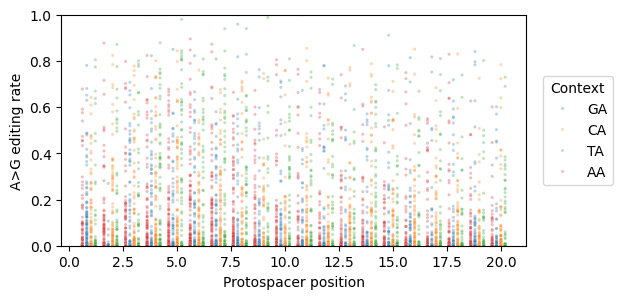

In [9]:
be.pl.editing_patterns.plot_by_pos_context(cedit_rates_df, target_bases=list(cdata_bulk.target_base_changes.keys()), save_fig = save_fig, save_path = f"{output_prefix}_pos_context.pdf")

### BE-Hive like plotting


In [10]:
cedit_rates_df.spacer_pos = cedit_rates_df.spacer_pos.astype(int)

In [11]:
cedit_rates_df

,guide,edit,rep_median,rep_mean,rel_pos,spacer_pos,base_change,context,spacer_pos_ctxt
0,12:51779544AGA_Maj_ABE_2_g1,-1:7:+:A>G,0.162679,0.188650,7,1,A>G,GA,0.8
1,12:51779544AGA_Maj_ABE_2_g1,-1:7:+:A>T,0.000000,0.000340,7,1,A>T,GA,0.8
2,12:51779544AGA_Maj_ABE_2_g1,0:8:+:G>A,0.000000,0.000000,8,2,G>A,AG,NaN
3,12:51779544AGA_Maj_ABE_2_g1,0:8:+:G>T,0.000000,0.000000,8,2,G>T,AG,NaN
4,12:51779544AGA_Maj_ABE_2_g1,10:18:+:C>A,0.000000,0.000758,18,12,C>A,CC,NaN
...,...,...,...,...,...,...,...,...,...
117488,rs9297994_Min_ABE_576_g2,19:19:+:A>G,0.000000,0.000000,19,13,A>G,GA,12.8
117489,rs9297994_Min_ABE_576_g5,23:23:+:A>G,0.000000,0.000000,23,18,A>G,AA,17.6
117490,rs9297994_Min_ABE_576_g5,25:25:+:A>G,0.000000,0.000000,25,20,A>G,AA,19.6
117491,rs9884390_Maj_ABE_345_g5,18:18:+:A>G,0.000000,0.000000,18,13,A>G,AA,12.6


A>G


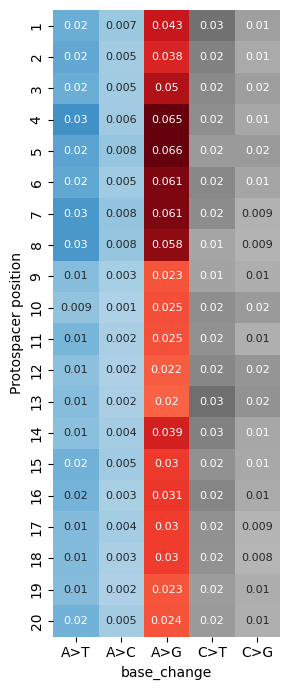

In [12]:
_, profile_df = be.pl.editing_patterns.plot_by_pos_behive(
    cedit_rates_df,
    cdata_bulk,
    target_basechanges=cdata_bulk.target_base_changes, 
)
profile_df.to_csv(f"{output_prefix}_behive_like_profile.csv")
if save_fig: plt.savefig(f"{output_prefix}_behive_like_profile.pdf", bbox_inches = 'tight')

A>G


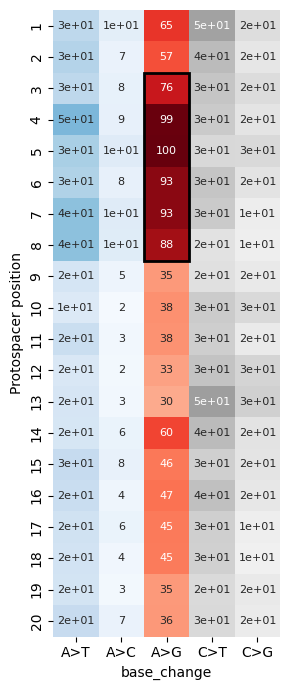

In [13]:
ax, _ = be.pl.editing_patterns.plot_by_pos_behive(
    cedit_rates_df,
    cdata_bulk,
    target_basechanges=cdata_bulk.target_base_changes, 
    normalize=True
)

for i, _ax in enumerate(ax):
    ag_rates = profile_df[cdata_bulk.uns['target_base_changes'].split(",")[i]]
    window_sum_maxpos = ag_rates.rolling(max_editing_window_length).sum().argmax()
    window_end = ag_rates.index[window_sum_maxpos]
    window_start = window_end - max_editing_window_length + 1
    _ax.add_patch(
        patches.Rectangle(
            (2, window_start-1),
            1,
            max_editing_window_length,
            edgecolor="black",
            fill=False,
            lw=2
        )
    )

if save_fig: plt.savefig(f"{output_prefix}_behive_like_profile_normed.pdf", bbox_inches = 'tight')

Box shows the window of the same length with maximal editing rates.

## Combination with PAM


In [14]:
target_base_changes = cdata_bulk.uns['target_base_changes'].split(',')
if pam_col is not None:
    be.pl.editing_patterns.plot_by_pos_pam(cdata_bulk, cedit_rates_df, target_base_changes, pam_col, save_fig=save_fig, save_path="{output_prefix}_pos_by_pam.pdf")
else:
    print("--pam-col not provided to `bean profile` so skipping the PAM by position output.")

--pam-col not provided to `bean profile` so skipping the PAM by position output.


## Context preference logo


Draw relative editing efficiency +1 and -1 the positions. Note that the confidence of the result may depend on how diverse your libray is in terms of sequence context around edits.

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f4b989b2f80>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f4b989b2ef0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_18loci/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated

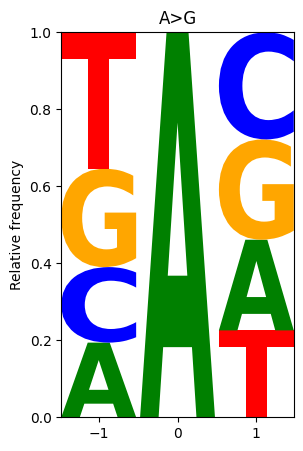

In [15]:
context_tbl = be.pl.editing_patterns.plot_context_specificity(cdata_bulk, cedit_rates_df, target_base_changes=target_base_changes, window=(window_start, window_end), save_fig = save_fig, save_path = f"{output_prefix}_context_preference_{window_start}_{window_end}.pdf")
context_tbl.to_csv(f"{output_prefix}_context.csv")